In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from analysis import bender_class
from config import path_to_repository
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import seaborn
seaborn.set(font='Arial',context='talk',font_scale=1.0, style='white')

Fig 1E -- min angle for 100% accuracy 

In [5]:
# Specify the curve fit type, 1 for linear, 2 for quadratic.  
degree = 2

# All Samples Tested Below Using Velcro

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized with initial value R₀: 190.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_reapplication_v1_4_22_25.csv']
ADC normalized with initial value R₀: 256.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_reapplication_v2_4_22_25.csv']
ADC normalized with initial value R₀: 211.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v2_4_17_25.csv']
ADC normalized with initial value R₀: 541.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv']
ADC normalized with initial value R₀: 310.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplic

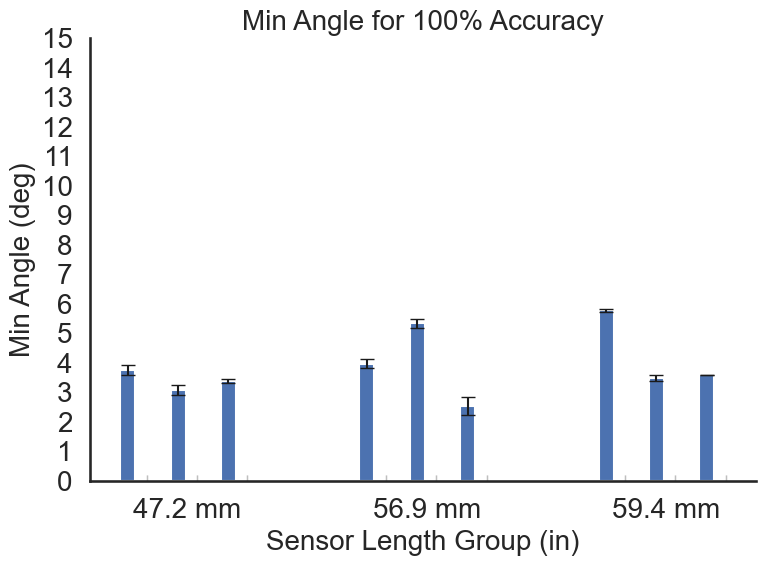

In [7]:
#1.86 reapply sample

DS1_datafiles = os.path.join(path_to_repository , "CSV Data/4_22_25/1.86_static_v1_4_22_25.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/4_22_25/1.86_reapplication_v1_4_22_25.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/4_22_25/1.86_reapplication_v2_4_22_25.csv")
#DS_test = os.path.join(path_to_repository , "CSV Data/5_5_25/1.86_static_v1_331x_test_5_5_25.csv")

#2.24 reapply sample

#DS4_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_static_v1_4_17_25.csv")
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_reapplication_v2_4_17_25.csv")
DS5_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv")
DS6_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_reapplication_v4_4_17_25.csv")

#2.34 reapply sample

DS7_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.34_static_v1_4_18_25.csv")
DS8_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.34_reapplication_v1_4_18_25.csv")
DS9_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.34_reapplication_v2_4_18_25.csv")



# Added these files to PK_data_accuracy_check tab in data_25_01_14.xlsx file 
DS_all = [[DS1_datafiles, DS2_datafiles, DS3_datafiles],
          [DS4_datafiles, DS5_datafiles, DS6_datafiles],
          [DS7_datafiles, DS8_datafiles, DS9_datafiles]
         ]

bar_labels = ["47.2 mm", "56.9 mm", "59.4 mm"]
bar_colors = ["b"]*len(bar_labels)
ma_100_list = []

# For each dataset -- show training and testing on individual datasets
for i_g, group in enumerate(DS_all):
    
    ma_100_list_group = []; 
    for i_d, datafiles in enumerate(group):
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_over_R0()
        g.train_model_test_accuracy(degree=degree)
        min_angle_100, all_min_angle_100 = g.get_min_accuracy_100()
        ma_100_list_group.append(all_min_angle_100)
    ma_100_list.append(ma_100_list_group)
        
g.plot_bar_chart(ma_100_list, bar_labels, title="Min Angle for 100% Accuracy", ylabel="Min Angle (deg)", colors=bar_colors,
                ylim=(0, 15))

Fig 1G -- boxplot 

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized with initial value R₀: 190.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_reapplication_v1_4_22_25.csv']
ADC normalized with initial value R₀: 256.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_reapplication_v2_4_22_25.csv']
ADC normalized with initial value R₀: 211.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v2_4_17_25.csv']
ADC normalized with initial value R₀: 541.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv']
ADC normalized with initial value R₀: 310.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplic

C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\autobender analysis\analysis.py:3631: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


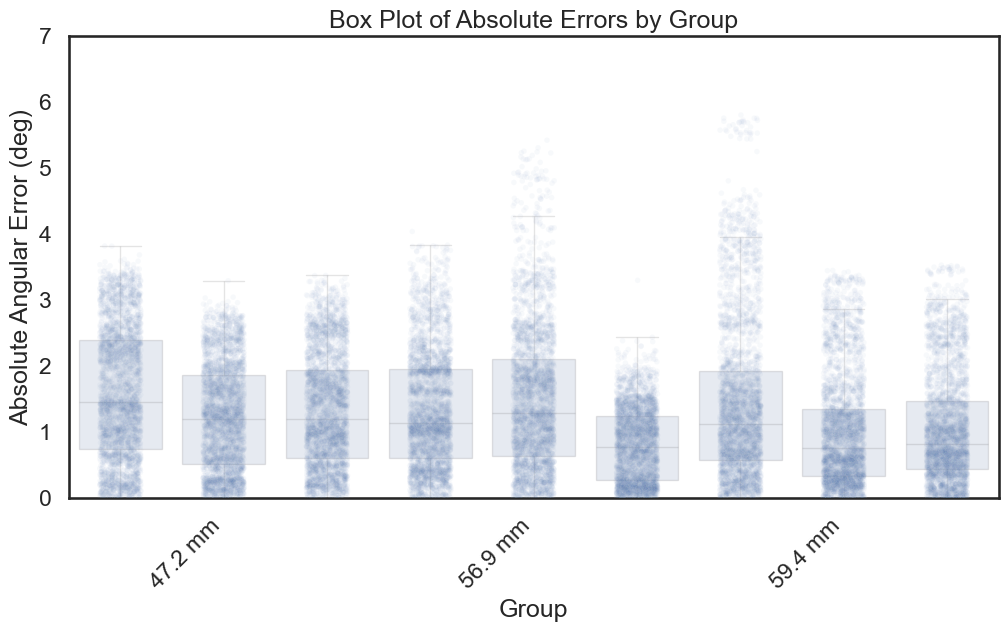

In [9]:
error_data_dict = {}  # Dictionary for box plot: {sample_name: error_values}
group_dict = {}  # Dictionary to map samples to groups

for i, group in enumerate(DS_all):  # Loop over groups
    for j, datafiles in enumerate(group):  # Loop over datasets in each group
        g = bender_class()
        g.load_data(datafiles)
        #g.normalize_adc_bw_01()
        g.normalize_adc_over_R0()
        g.train_model_test_accuracy(degree=degree)
        
        # Use cross_validation_angular_error to get error data
        mean_error, std_error, predictions_df = g.cross_validation_angular_error(degree=degree)

        if not isinstance(predictions_df, pd.DataFrame):
            raise TypeError(f"Expected cross_validation_angular_error to return a DataFrame, got {type(predictions_df)}")

        # Ensure the DataFrame contains the 'Absolute Error' column
        if "Absolute Error" not in predictions_df.columns:
            raise ValueError(f"Dataset from {datafiles} does not contain 'Absolute Error' column")

        # Assign unique sample names and store error values
        sample_name = f"Group{i+1}_Sample{j+1}"  
        error_data_dict[sample_name] = predictions_df['Absolute Error'].tolist()
        group_dict[sample_name] = bar_labels[i]  # Assign to group

    
g.plot_box_plot(error_data_dict, group_dict, bar_colors, bar_labels,  box_alpha=0.15, data_alpha=0.04, jitter=0.2)

Pairwise plots 1F

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_reapplication_v1_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_reapplication_v2_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v2_4_17_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CS

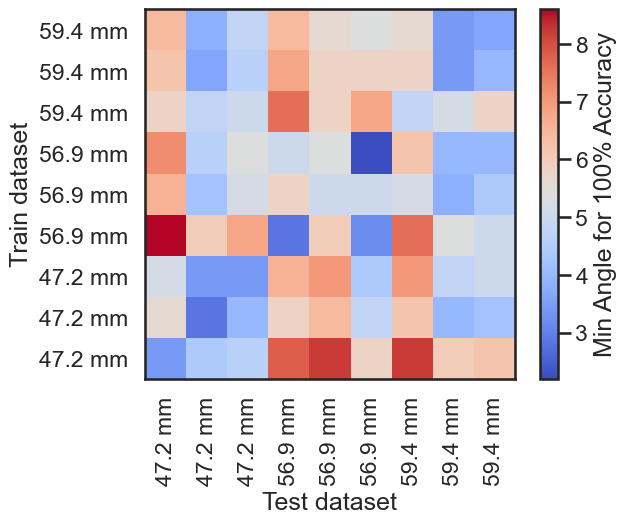

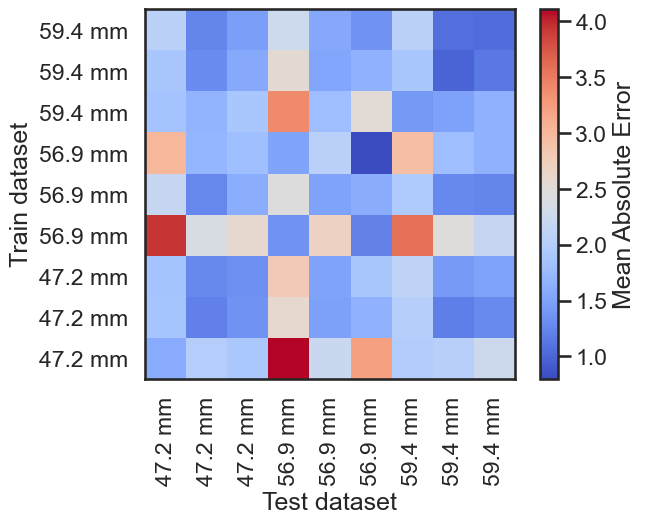

In [11]:
# Initialize results list
DS_flat = []; xlabel_flat = []
for _, (ds_group, ds_lab) in enumerate(zip(DS_all, bar_labels)):
    xlabel_flat.extend([ds_lab]*len(ds_group))
    DS_flat.extend(ds_group)

pairwise_min_accuracy = np.zeros((len(DS_flat), len(DS_flat))) + np.nan
pairwise_abs_error = np.zeros((len(DS_flat), len(DS_flat))) + np.nan

# Iterate over each dataset as the training dataset
for i, train_datafiles in enumerate(DS_flat):
    train_name = 'DS'+str(i+1)
    
    g = bender_class()
    g.load_data(train_datafiles)
    g.normalize_adc_bw_01()
    #g.normalize_adc_over_R0()

    # Train the model before testing (for off-diagonal cases)
    # This is a model fit on training data (make this as high as possible)
    # Just need 1 iteration to get the model
    g.train_model_test_accuracy(perc_train = 0.99, niter=1, degree=degree)


    for j, test_datafiles in enumerate(DS_flat):
        
        # Diagonal Case (Within-Sample Testing)
        if i == j:
            # Make a new bender class with new model (fit on 80%, test on 20% x 10 times)
            g2 = bender_class()
            g2.load_data(train_datafiles)
            g2.normalize_adc_bw_01()
            #g2.normalize_adc_over_R0()

            # Do typical train on 80%, test on 20% x 10 times 
            g2.train_model_test_accuracy(perc_train = 0.8, niter=10, degree=2)
            min_angle_100, all_min_angle_100 = g.get_min_accuracy_100()
            pairwise_min_accuracy[i, j] = np.mean(np.array(all_min_angle_100))
            pairwise_abs_error[i, j] = np.mean(np.hstack((g2.abs_angular_error)))
        # Off-Diagonal Case (Cross-Sample Testing)
        else:

            # Load test dataset separately
            g_test = bender_class()
            g_test.load_data(test_datafiles)  
            g_test.normalize_adc_bw_01()
            #g_test.normalize_adc_over_R0()
            df_test = g_test.data

            # Run multiple accuracy tests
            acc = []; error = []
            for _ in range(10): 
                accuracy, abs_error = g.predict_new_data(train_test_split(df_test, test_size=0.2, shuffle=True, random_state=42)[1])
                acc.append(accuracy)
                error.append(abs_error)

            # Compute Min Angle for Accuracy 100%
            min_angle_100, all_min_angle_100 = g.get_min_accuracy_100(accuracy_matrix=np.vstack(acc)) or (np.nan, None)
            pairwise_min_accuracy[i, j] = np.mean(np.array(all_min_angle_100))

            mean_error = np.mean(np.hstack((error)))
            pairwise_abs_error[i, j] = mean_error

for _, (data, title) in enumerate(zip([pairwise_min_accuracy, pairwise_abs_error], 
                                      ['Min Angle for 100% Accuracy', 'Mean Absolute Error'])):
    f, ax = plt.subplots()
    plt.pcolormesh(data, cmap='coolwarm', vmin=np.nanmin(data), vmax=np.nanmax(data))
    plt.xticks(np.arange(len(DS_flat))+0.5, xlabel_flat, rotation=90)
    plt.xlabel('Test dataset')
    plt.yticks(np.arange(len(DS_flat))+0.5, xlabel_flat)
    plt.ylabel('Train dataset')
    plt.axis('square')
    plt.colorbar(label=title)


C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\autobender analysis\analysis.py:4017: SyntaxWarning: invalid escape sequence '\D'
  ax[0].set_ylabel('$\Delta R/R_o$')
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\autobender analysis\analysis.py:4024: SyntaxWarning: invalid escape sequence '\D'
  ax[1].set_ylabel('$\Delta R/R_o$')
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\autobender analysis\analysis.py:4313: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_ylabel('$\Delta R/R_o$', color='b')
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\autobender analysis\analysis.py:4328: SyntaxWarning: invalid escape sequence '\e'
  ax2.set_xlabel('$\epsilon$ (strain)')


AssertionError: Provide x_sample_centers for paired=True

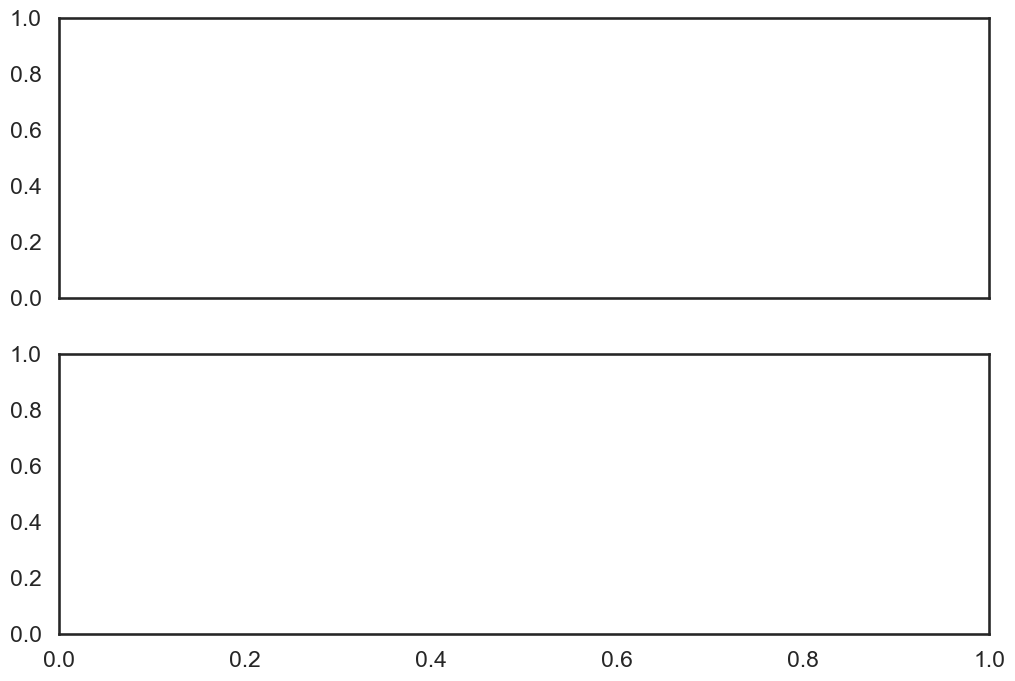

In [12]:
g.plot_compact_pairwise_comparison(pairwise_min_accuracy, pairwise_abs_error, xlabel_flat, ylim=(0, 8))


['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_reapplication_v1_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_reapplication_v2_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v2_4_17_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sens

C:\Users\toppe\AppData\Local\Temp\ipykernel_26804\1559607679.py:238: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


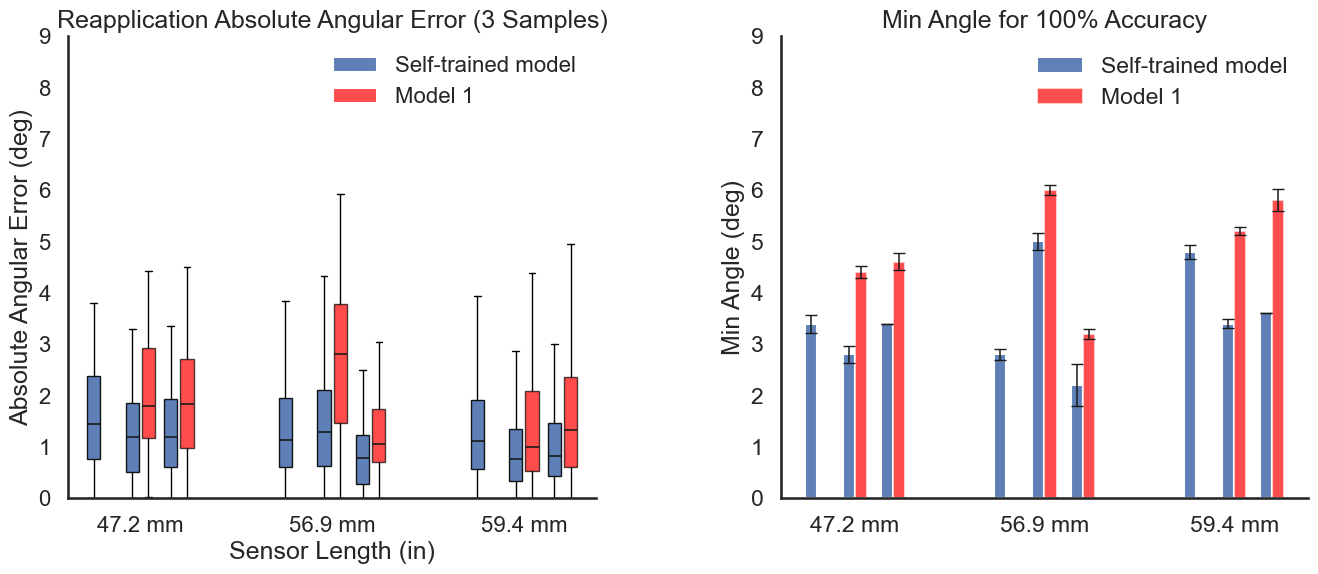

In [20]:
# --- imports ---
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ---- style knobs ----
TITLE_FONTSIZE = 18
LABEL_FONTSIZE = 18
XTICK_FONTSIZE = 16
YTICK_FONTSIZE = 16
WHISKER_INDEX_FONTSIZE = 14
WHISKER_INDEX_WEIGHT = 'bold'

# ------------------------------------------------------------
# 1) LEFT DATA: gather self-trained absolute-error distributions
#    + collect self min-angle distributions for right-plot error bars
# ------------------------------------------------------------
group_errors = []
sample_labels_by_group = []
ma100_self_list = []  # per-group list of arrays per sample (for right-plot error bars)

for group in DS_all:
    group_errs = []
    group_sample_labels = []
    group_ma100 = []

    for datafiles in group:
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_bw_01()  # keep normalization consistent everywhere
        g.train_model_test_accuracy(degree=degree)

        mean_error, std_error, predictions_df = g.cross_validation_angular_error(degree=degree)
        if not isinstance(predictions_df, pd.DataFrame):
            raise TypeError(f"cross_validation_angular_error returned {type(predictions_df)}, expected DataFrame")
        if "Absolute Error" not in predictions_df.columns:
            raise ValueError(f"{os.path.basename(datafiles)} missing 'Absolute Error' column")

        errs = predictions_df["Absolute Error"].dropna().tolist()
        group_errs.append(errs)

        # self min-angle distribution
        _, all_min_angle_100 = g.get_min_accuracy_100()
        group_ma100.append(np.asarray(all_min_angle_100).ravel())

        base = os.path.splitext(os.path.basename(datafiles))[0]
        group_sample_labels.append(base)

    group_errors.append(group_errs)
    sample_labels_by_group.append(group_sample_labels)
    ma100_self_list.append(group_ma100)

# ------------------------------------------------------------
# 2) CROSS DATA: build model-1 cross distributions (left & right)
#    - left: cross abs-error per sample
#    - right: cross min-angle distributions (for error bars)
#    - no red for the first sample in each group
# ------------------------------------------------------------
group_cross_errors = []
ma100_cross_list = []

for group in DS_all:
    # train model-1 on the first sample in this group
    g_m1 = bender_class()
    g_m1.load_data(group[0])
    g_m1.normalize_adc_bw_01()
    g_m1.train_model_test_accuracy(perc_train=0.99, niter=1, degree=degree)

    group_cross = []
    group_cross_ma100 = []

    for i_s, test_file in enumerate(group):
        g_test = bender_class()
        g_test.load_data(test_file)
        g_test.normalize_adc_bw_01()
        df_test = g_test.data

        acc_runs = []
        abs_errs = []
        # vary random_state across runs to get real variability
        for rs in range(10):
            _, X_test = train_test_split(df_test, test_size=0.2, shuffle=True, random_state=rs)
            acc, abs_error = g_m1.predict_new_data(X_test)
            acc_runs.append(np.asarray(acc))
            abs_errs.extend(np.asarray(abs_error).ravel())

        group_cross.append(abs_errs)

        # cross min-angle distribution from multiple accuracy runs
        _, all_min_angle_100 = g_m1.get_min_accuracy_100(
            accuracy_matrix=np.vstack(acc_runs)
        ) or (np.nan, [])
        group_cross_ma100.append(np.asarray(all_min_angle_100).ravel())

    group_cross_errors.append(group_cross)
    ma100_cross_list.append(group_cross_ma100)

# ------------------------------------------------------------
# 3) LEFT POSITIONS & COLORS (unchanged)
# ------------------------------------------------------------
box_width           = 0.26
paired_offset       = 0.32
intra_group_spacing = 0.76
gap_between_groups  = 1.50

positions        = []  # sample centers (for labels)
positions_self   = []  # x for blue
positions_cross  = []  # x for red  (filtered later)
colors_for_boxes = []
xticks_group     = []

if len(bar_colors) != len(bar_labels):
    bar_colors = ["b"] * len(bar_labels)

x_cursor = 1.0
for (group_errs, lbl) in zip(group_errors, bar_labels):
    n = len(group_errs)
    centers = list(x_cursor + np.arange(n) * intra_group_spacing)
    positions.extend(centers)
    xticks_group.append(np.mean(centers))

    positions_self.extend([x - paired_offset/2 for x in centers])
    positions_cross.extend([x + paired_offset/2 for x in centers])

    colors_for_boxes.extend([bar_colors[len(xticks_group)-1]] * n)
    x_cursor = centers[-1] + gap_between_groups + intra_group_spacing

flat_errs_self = [errs for grp in group_errors for errs in grp]

# For cross (LEFT): **skip first sample in each group**
flat_errs_cross_filtered = []
positions_cross_filtered = []
cross_sample_mask = []  # True where cross (red) exists)

sample_idx = 0
for gi, grp in enumerate(DS_all):
    for i in range(len(grp)):
        has_cross = (i != 0)
        cross_sample_mask.append(has_cross)
        if has_cross:
            flat_errs_cross_filtered.append(group_cross_errors[gi][i])
            positions_cross_filtered.append(positions_cross[sample_idx])
        sample_idx += 1

# ------------------------------------------------------------
# 4) RIGHT: means for bars come from the pairwise matrix
#    (assumed computed elsewhere in your pipeline)
# ------------------------------------------------------------
# Build xlabel_flat for the method
xlabel_flat = []
for lbl, group in zip(bar_labels, DS_all):
    xlabel_flat.extend([f"{lbl} #{i+1}" for i in range(len(group))])

# ------------------------------------------------------------
# 5) PLOT: left manual + right via class method
# ------------------------------------------------------------
fig, (axL, axR) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={"wspace": 0.35})

# ---- LEFT: paired boxplots (self vs cross) ----
bp_self = axL.boxplot(
    flat_errs_self, positions=positions_self, widths=box_width,
    patch_artist=True, showfliers=False,
    medianprops={"color":"k","linewidth":1.2}
)
bp_cross = axL.boxplot(
    flat_errs_cross_filtered, positions=positions_cross_filtered, widths=box_width,
    patch_artist=True, showfliers=False,
    medianprops={"color":"k","linewidth":1.2}
)

# Color boxes
for patch, c in zip(bp_self['boxes'], colors_for_boxes):
    patch.set_facecolor(c); patch.set_alpha(0.9)
for patch in bp_cross['boxes']:
    patch.set_facecolor('red'); patch.set_alpha(0.7)

# Labels & aesthetics
axL.set_xticks(xticks_group)
axL.set_xticklabels(bar_labels, fontsize=XTICK_FONTSIZE)
axL.set_xlabel("Sensor Length (in)", fontsize=LABEL_FONTSIZE)
axL.set_ylabel("Absolute Angular Error (deg)", fontsize=LABEL_FONTSIZE)
axL.set_title("Reapplication Absolute Angular Error (3 Samples)", fontsize=TITLE_FONTSIZE)
axL.tick_params(axis='x', labelsize=XTICK_FONTSIZE)
axL.tick_params(axis='y', labelsize=YTICK_FONTSIZE)
axL.spines['top'].set_visible(False); axL.spines['right'].set_visible(False)
axL.set_ylim(0, 9)

# (Optional) force y-ticks every 1 deg
import matplotlib.ticker as mticker
axL.yaxis.set_major_locator(mticker.MultipleLocator(1.0))
axL.yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
axL.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))

# NO numbers above whiskers — we removed that entire axL.text(...) loop

from matplotlib.patches import Patch
axL.legend(
    handles=[
        Patch(facecolor=bp_self['boxes'][0].get_facecolor(),  label='Self-trained model'),
        Patch(facecolor=(bp_cross['boxes'][0].get_facecolor() if bp_cross['boxes'] else (1,0,0,0.7)),
              label='Model 1'),
    ],
    frameon=False, fontsize=XTICK_FONTSIZE, loc='upper right'
)



# ---- RIGHT: use your class method to draw into axR ----
# Note: pairwise_min_accuracy and pairwise_abs_error must already be computed.
g_for_plot = bender_class()  # any instance
left_self_color  = bp_self['boxes'][0].get_facecolor()
left_cross_color = bp_cross['boxes'][0].get_facecolor() if bp_cross['boxes'] else (1,0,0,0.7)
g_for_plot.plot_compact_pairwise_comparison(
    pairwise_min_accuracy=pairwise_min_accuracy,
    pairwise_abs_error=pairwise_abs_error,
    xlabel_flat=xlabel_flat,
    group_size=len(DS_all[0]),
    title1='Min Angle for 100% Accuracy',
    ylim=(0, 9),
    self_minangle_dists=ma100_self_list,
    cross_minangle_dists=ma100_cross_list,
    err_metric='sd',
    capsize=4,
    ax_top=axR,                      # draw into RIGHT axes
    x_sample_centers=positions,      # same centers you used on the LEFT
    group_centers=xticks_group,
    group_labels=bar_labels,
    bar_w=0.24,
    paired=True,
    show_sample_numbers=False,       # no numbers above bars
    self_color=left_self_color,      # EXACT match to left blue
    cross_color=left_cross_color,    # EXACT match to left red
    legend_self_label='Self-trained model',
    legend_cross_label='Model 1',
    tick_every_1=True
)


plt.tight_layout()
plt.savefig("left_boxplots_and_right_pairwise_method.pdf", dpi=300, bbox_inches='tight')
plt.show()


## Paired T-Test for reapplication (1st application blue vs reapplication reds)

Average MAE across samples and applicartions 

In [22]:
from scipy.stats import ttest_rel

rows = []

for gi, group in enumerate(DS_all):

    # skip groups without reapplications
    if len(group) < 2:
        continue

    # --- SELF-trained MAE for this sample ---
    # average across all reapplication samples (si > 0)
    mae_self_vals = []
    mae_cross_vals = []

    for si in range(1, len(group)):
        mae_self_vals.append(np.mean(group_errors[gi][si]))
        mae_cross_vals.append(np.mean(group_cross_errors[gi][si]))

    rows.append({
        "group": bar_labels[gi],
        "MAE_self_avg": np.mean(mae_self_vals),
        "MAE_cross_avg": np.mean(mae_cross_vals),
        "delta_MAE": np.mean(mae_cross_vals) - np.mean(mae_self_vals)
    })

df_mae = pd.DataFrame(rows)
display(df_mae)

# --- Paired t-test: self-trained vs cross-trained (sample-averaged) ---
t, p = ttest_rel(df_mae["MAE_cross_avg"], df_mae["MAE_self_avg"])
print(f"Paired t-test (cross vs self, sample-averaged): "
      f"t({len(df_mae)-1}) = {t:.3f}, p = {p:.4f}")


,group,MAE_self_avg,MAE_cross_avg,delta_MAE
0,47.2 mm,1.274034,1.927563,0.653529
1,56.9 mm,1.143090,1.949630,0.806539
2,59.4 mm,1.026556,1.496899,0.470343


Paired t-test (cross vs self, sample-averaged): t(2) = 6.621, p = 0.0221


## Linear Fixed Effects Model of Above (n = 6)

In [25]:
import statsmodels.formula.api as smf

df_long = []  # build long-format table
for gi, group in enumerate(DS_all):
    for si in range(1, len(group)):
        df_long.append({
            "sensor": bar_labels[gi],
            "reapp": si,
            "MAE_self": np.mean(group_errors[gi][si]),
            "MAE_cross": np.mean(group_cross_errors[gi][si]),
        })

df = pd.DataFrame(df_long)
df = df.melt(
    id_vars=["sensor", "reapp"],
    value_vars=["MAE_self", "MAE_cross"],
    var_name="training",
    value_name="MAE"
)

model = smf.mixedlm(
    "MAE ~ training",
    df,
    groups=df["sensor"]
).fit()

print(model.summary())


             Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    MAE    
No. Observations:     12         Method:                REML   
No. Groups:           3          Scale:                 0.1655 
Min. group size:      4          Log-Likelihood:        -6.9858
Max. group size:      4          Converged:             Yes    
Mean group size:      4.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             1.791    0.166 10.788 0.000  1.466  2.117
training[T.MAE_self] -0.643    0.235 -2.740 0.006 -1.104 -0.183
Group Var             0.000    0.148                           



C:\Users\toppe\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


## Does each successive cross-trained reapplication (red) increase mae ?

Average MAE across samples and applicartions 

In [ ]:

rows = []

for gi, lbl in enumerate(bar_labels):
    # require both 2nd and 3rd reapplications
    if len(group_cross_errors[gi]) < 3:
        continue

    mae_2nd = np.mean(group_cross_errors[gi][1])
    mae_3rd = np.mean(group_cross_errors[gi][2])

    rows.append({
        "group": lbl,
        "MAE_2nd": mae_2nd,
        "MAE_3rd": mae_3rd,
        "delta_3rd_minus_2nd": mae_3rd - mae_2nd
    })

df_23 = pd.DataFrame(rows)
display(df_23)

# Paired t-test: does MAE increase from 2nd → 3rd?
t, p = ttest_rel(df_23["MAE_3rd"], df_23["MAE_2nd"])
print(f"Paired t-test (3rd vs 2nd): t({len(df_23)-1}) = {t:.3f}, p = {p:.4f}")


## Paired T-Test for reapplication (reapplication blue vs reapplication red)

In [ ]:

from scipy.stats import ttest_rel

rows = []

for gi, group in enumerate(DS_all):
    for si in range(len(group)):

        # Reapplications only: skip the first sample in each group
        if si == 0:
            continue

        mae_self  = float(np.mean(np.asarray(group_errors[gi][si], dtype=float)))
        mae_cross = float(np.mean(np.asarray(group_cross_errors[gi][si], dtype=float)))

        rows.append({
            "group": bar_labels[gi],
            "sample_in_group": si + 1,
            "MAE_self": mae_self,
            "MAE_cross": mae_cross,
            "delta_self_minus_cross": mae_self - mae_cross
        })

df_reapp = pd.DataFrame(rows).sort_values(["group", "sample_in_group"])
display(df_reapp)

# Paired t-test across all reapplication samples (pooled)
t, p = ttest_rel(df_reapp["MAE_self"].values, df_reapp["MAE_cross"].values)
print(f"Paired t-test (self vs cross; reapplications only): t({len(df_reapp)-1}) = {t:.3f}, p = {p:.4g}")

# Optional: direction check
mean_delta = df_reapp["delta_self_minus_cross"].mean()
print(f"Mean(self - cross) = {mean_delta:.3f} deg (negative => self better)")


In [ ]:
# --- average reapplication mae within each physical sample (group) ---
df_by_sample = df_reapp.groupby("group", as_index=False).agg(
    MAE_self=("MAE_self", "mean"),
    MAE_cross=("MAE_cross", "mean")
)
df_by_sample["delta_self_minus_cross"] = df_by_sample["MAE_self"] - df_by_sample["MAE_cross"]
display(df_by_sample)

t_s, p_s = ttest_rel(df_by_sample["MAE_self"].values, df_by_sample["MAE_cross"].values)
print(f"Paired t-test across samples (avg of 2 reapps): t({len(df_by_sample)-1}) = {t_s:.3f}, p = {p_s:.4g}")

print(f"Mean(self - cross) across samples = {df_by_sample['delta_self_minus_cross'].mean():.3f} deg")


## Paired T-test across self-trained (blue bars) for three samples

In [ ]:
from scipy.stats import ttest_rel

rows = []

for gi, group in enumerate(DS_all):

    # initial self-trained MAE (sample-level)
    mae_initial = float(np.mean(np.asarray(group_errors[gi][0], dtype=float)))

    # reapplications: self-trained only (indices 1 and 2)
    reapp_maes = []
    for si in range(1, len(group)):
        reapp_maes.append(
            float(np.mean(np.asarray(group_errors[gi][si], dtype=float)))
        )

    mae_reapp_mean = np.mean(reapp_maes)

    rows.append({
        "group": bar_labels[gi],
        "MAE_initial_self": mae_initial,
        "MAE_reapp_self_mean": mae_reapp_mean,
        "delta_reapp_minus_initial": mae_reapp_mean - mae_initial
    })

df_self_reapp = pd.DataFrame(rows)
display(df_self_reapp)

# Paired t-test across samples
t, p = ttest_rel(
    df_self_reapp["MAE_initial_self"],
    df_self_reapp["MAE_reapp_self_mean"]
)

print(f"Paired t-test (self-training degradation): t({len(df_self_reapp)-1}) = {t:.3f}, p = {p:.4g}")
print(f"Mean increase in MAE = {df_self_reapp['delta_reapp_minus_initial'].mean():.3f} deg")


## Percent of data less than 5 degrees for self train (blue bars) and cross train (red bars)

In [ ]:

# --------------------
# BLUE (self-trained)
# --------------------
all_blue_errs = []

for gi, group in enumerate(group_errors):
    for errs in group:
        errs = np.asarray(errs, dtype=float)
        errs = errs[~np.isnan(errs)]
        all_blue_errs.extend(errs.tolist())

all_blue_errs = np.asarray(all_blue_errs)

pct_blue_le5 = 100 * np.mean(all_blue_errs <= ERROR_THRESH_DEG)


# --------------------
# RED (cross-trained)
# --------------------
all_red_errs = []

for gi, group in enumerate(group_cross_errors):
    for si, errs in enumerate(group):
        # skip first sample (no red bar plotted)
        if si == 0:
            continue

        errs = np.asarray(errs, dtype=float)
        errs = errs[~np.isnan(errs)]
        all_red_errs.extend(errs.tolist())

all_red_errs = np.asarray(all_red_errs)

pct_red_le5 = 100 * np.mean(all_red_errs <= ERROR_THRESH_DEG)


In [ ]:
print(f"Self-trained (blue): {pct_blue_le5:.2f}% of predictions ≤ 5°")
print(f"Cross-trained (red): {pct_red_le5:.2f}% of predictions ≤ 5°")

print(f"Δ (self − cross) = {pct_blue_le5 - pct_red_le5:.2f}%")


In [ ]:
i = 6; j = 6 # dataset 1 is a bad test dataset
g = bender_class()
g.load_data(DS_flat[8])
g.normalize_adc_over_R0()
g.plot_data()
#g.train_model_test_accuracy(perc_train = 0.99, niter=1)

g_test = bender_class()
g_test.load_data(DS_flat[j])
g_test.normalize_adc_over_R0()
g_test.plot_data(scatter=True)

In [ ]:
# Plotting same reapplication sample (all with velcro!) on top of each other to see how different they can be...hence the need for normalization from 0-1!
# My thought is that some samples are pre-tensioned different amounts, thus varying initial resistances slightly 0.4 ohm vs 0.45 ohm 
#(hard to measure resistance to 2 decimal place accuracy with multimeter) and therefore differnt changes in resistances.  Also, velcro attachment might not be same for each test, those more movement in sample.  
#Regardless, normalization from 0-1 still for reapplication still looks pretty good, suggesting that testing a sample first in the lab and then sending out 
#to participant may work.  

#I hypothesize that if the sample were to be placed with the exact same pre-tension and in the exact same location, the curves would lie more or less on top of each other.


# Create figure and axis manually
fig, ax = plt.subplots()

# Load and normalize data from multiple datasets
for path in [DS_flat[3], DS_flat[4], DS_flat[5]]:  
    b = bender_class()
    b.load_data(path)
    b.normalize_adc_over_R0()

    # Plot on the same axis
    ax.plot(b.data['Rotary Encoder'], b.data['ADC Value'], '.', label=path.split('/')[-1])

# Label and show
ax.set_xlabel('Angle (deg)')
ax.set_ylabel('Normalized ADC')
ax.set_title('Single Sample For Reapplication Analysis')
ax.legend()
plt.show()